# Prediction of Agricultural Crops

### Imports

In [1]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #to remove unwanted warnings

### Load Dataset

In [2]:
col=['Nitrogen','Phosphorus','Potassium ','Temperature','Humidity','ph','Rainfall','label']
crop=pd.read_csv("Crop_recommendation.csv",names=col) 
print(crop.head())

   Nitrogen  Phosphorus  Potassium   Temperature   Humidity        ph  \
0        90          42          43    20.879744  82.002744  6.502985   
1        85          58          41    21.770462  80.319644  7.038096   
2        60          55          44    23.004459  82.320763  7.840207   
3        74          35          40    26.491096  80.158363  6.980401   
4        78          42          42    20.130175  81.604873  7.628473   

     Rainfall label  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice  


### Processing Data

In [3]:
print("shape:",crop.shape, "\n")
print("Size:",crop.size)

shape: (2200, 8) 

Size: 17600


In [4]:
print("no of samples available for each type")
print(crop['label'].value_counts())

no of samples available for each type
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [5]:
print(crop.describe())

          Nitrogen   Phosphorus   Potassium   Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     Rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
ph             0
Rainfall       0
label          0
dtype: int64

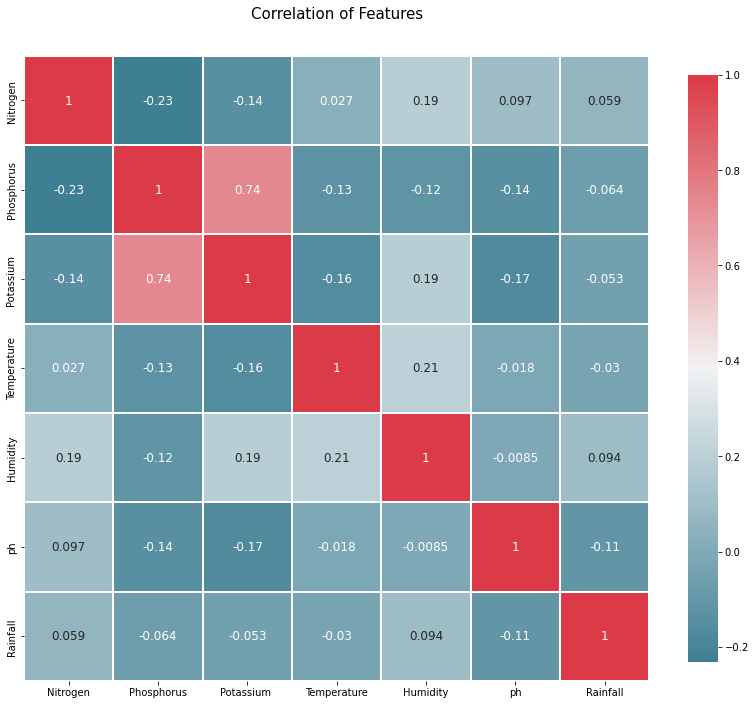

In [8]:
def correlation(crop):
    _ , ax =plt.subplots(figsize =(14,12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        crop.corr(),
        cmap = colormap,
        square = True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }  )
    
    plt.title('Correlation of Features', y=1.05, size=15)
    
correlation(crop)

In [9]:
#Splitting the data
X=crop.iloc[:,:7]#features
y=crop.iloc[:,7:]#class labels
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
      #train=80% and test=20% data is randomly split
    
print('Train Shape: {}'.format(X_train.shape))
print('Test Shape: {}'.format(X_test.shape))

Train Shape: (1760, 7)
Test Shape: (440, 7)


# Model

### K-Nearest Neighbour Classifier

In [10]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# to find the best k using brute force
cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,X_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(X_train,y_train)
pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal k = 5 using brute is 96.5909090909091


In [12]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.94      0.97        17
      cotton       0.96      1.00      0.98        25
      grapes       1.00      1.00      1.00        16
        jute       0.67      0.71      0.69        14
 kidneybeans       0.93      1.00      0.96        25
      lentil       0.92      0.96      0.94        25
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        15
   mothbeans       0.95      0.90      0.93        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        21
      papaya       1.00    

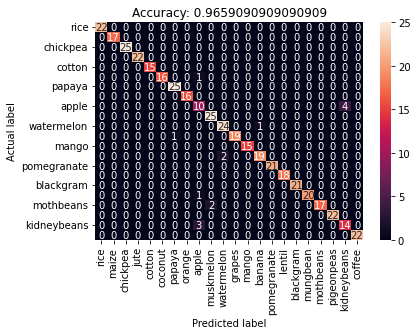

In [13]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['rice','maize','chickpea','jute','cotton','coconut','papaya','orange','apple','muskmelon','watermelon','grapes','mango','banana','pomegranate','lentil','blackgram','mungbean','mothbeans','pigeonpeas','kidneybeans','coffee'], 
                     columns = ['rice','maize','chickpea','jute','cotton','coconut','papaya','orange','apple','muskmelon','watermelon','grapes','mango','banana','pomegranate','lentil','blackgram','mungbean','mothbeans','pigeonpeas','kidneybeans','coffee'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy: {0}'.format(knn_optimal.score(X_test, y_test)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
#Testing using KNN
testSet = [[85, 58, 41, 21.77046, 80.31964, 7.038096, 226.6555]]
test = pd.DataFrame(testSet)
print(test)
print("predicted:",knn_optimal.predict(test))
print("neighbors",knn_optimal.kneighbors(test))

    0   1   2         3         4         5         6
0  85  58  41  21.77046  80.31964  7.038096  226.6555
predicted: ['rice']
neighbors (array([[3.77635763e-05, 8.56570934e+00, 9.96382265e+00, 1.02543991e+01,
        1.13803479e+01]]), array([[1712,  990,  401, 1266, 1428]], dtype=int64))


### Naive Bayes Classifier

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

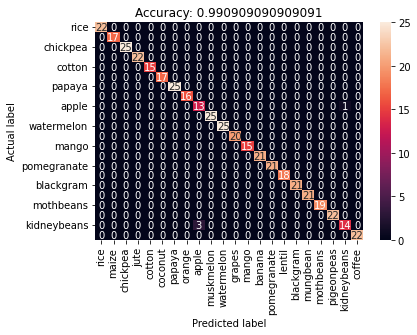

In [16]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['rice','maize','chickpea','jute','cotton','coconut','papaya','orange','apple','muskmelon','watermelon','grapes','mango','banana','pomegranate','lentil','blackgram','mungbean','mothbeans','pigeonpeas','kidneybeans','coffee'], 
                     columns = ['rice','maize','chickpea','jute','cotton','coconut','papaya','orange','apple','muskmelon','watermelon','grapes','mango','banana','pomegranate','lentil','blackgram','mungbean','mothbeans','pigeonpeas','kidneybeans','coffee'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy: {0}'.format(nb.score(X_test, y_test)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
#Testing using Naive Bayes
testSet = [[11, 57, 23, 21.18857178, 19.61964599, 5.728038096, 136.9876435]]   
test = pd.DataFrame(testSet)
print(test)
print("predicted:",nb.predict(test))

    0   1   2          3          4         5           6
0  11  57  23  21.188572  19.619646  5.728038  136.987643
predicted: ['kidneybeans']
